In [1]:
import sklearn
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data(filepath):
    data = load_svmlight_file(filepath)
    return data[0], data[1]

X, Y = get_data('C:/Users/WestbrookV/Desktop/a9a')
X_Test,y_Test = get_data('C:/Users/WestbrookV/Desktop/a9a.t')


from sklearn.model_selection import train_test_split

y_Test = np.mat(y_Test)
y_Test = y_Test.T

Y= np.mat(Y)
Y = Y.T

m = X_Test.shape[0]
z = np.zeros(m)
X_Test =X_Test.todense()
X_Test = np.column_stack((X_Test,z))
m1 = X_Test.shape[0]
o = np.ones(m1)
X_Test = np.column_stack((X_Test,o))

o1 = np.ones(X.shape[0])
X = X.todense()
X = np.column_stack((X,o1))


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

start
finish


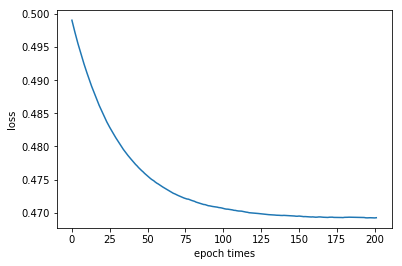

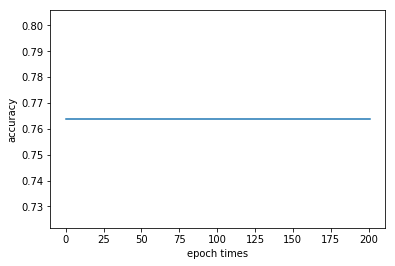

In [13]:
#NAG

V = np.zeros(124);
V = np.mat(V)
V = V.T

w_NAG= np.zeros(124);
w_NAG= np.mat(w_NAG)
w_NAG = w_NAG.T

loss = 0
iterator = 0
times4 = []
loss_NAG = []
NAG_accuracy = []

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)
    
    
    w_NAG = gradient_NAG(X_train,y_train,w_NAG-0.9*V,0.03,V)

    loss = cal_loss(X_Test,y_Test,w_NAG,0.5)
       
    times4.append(iterator)
    loss_NAG.append(loss[0,0])
    NAG_accuracy.append(cal_right_rate(X_Test,y_Test,w_NAG))
    
    if ( iterator>200):  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times4,loss_NAG)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times4,NAG_accuracy)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

start
finish


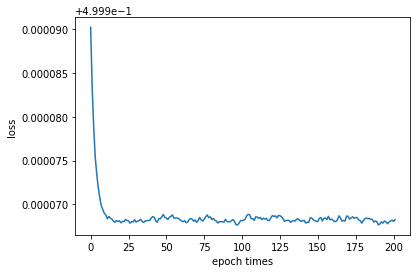

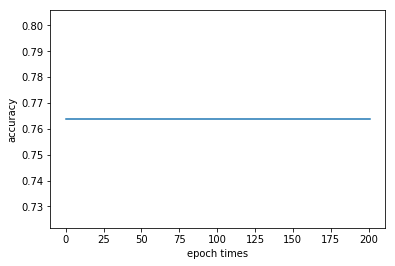

In [40]:
#RMSProp

# RMSProp
G = np.zeros(124);
G = np.mat(G)
G = G.T

w_RMSProp = np.zeros(124);
w_RMSProp = np.mat(w_RMSProp)
w_RMSProp = w_RMSProp.T

loss = 0
times1 = []
loss_RMSProp = []
accuracy_RMSProp = []
iterator = 0

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)

    y_train = np.mat(y_train)

    
    w_RMSProp = gradient_RMSProp(X_train,y_train,w_RMSProp,0.00003,G) 

    loss = cal_loss(X_Test,y_Test,w_RMSProp,0.5)

    times1.append(iterator)
    loss_RMSProp.append(loss[0,0])
    accuracy_RMSProp.append(cal_right_rate(X_Test,y_Test,w_RMSProp))
        
    if ( iterator>200): #如果误差小于5或者迭代次数大于10000则停止  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times1 , loss_RMSProp)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times1 , accuracy_RMSProp)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

start
finish


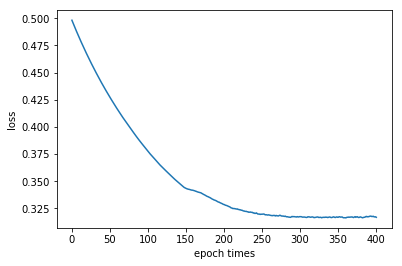

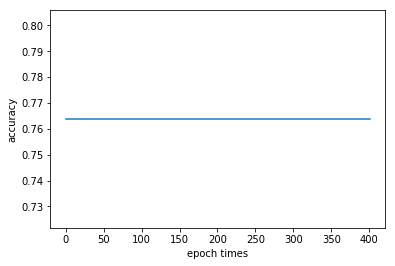

In [24]:
#AdaDelta
loss = 0
G_D = np.zeros(124);
G_D = np.mat(G_D)
G_D = G_D.T
Delta_D = np.zeros(124)
Delta_D = np.mat(Delta_D)
Delta_D = Delta_D.T

times2 = []
loss_AdaDelta = []
accuracy_AdaDelta = []
iterator = 0

w_AdaDelta = np.zeros(124);
w_AdaDelta = np.mat(w_AdaDelta)
w_AdaDelta = w_AdaDelta.T

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)

    
    w_AdaDelta = gradient_AdaDelta(X_train,y_train,w_AdaDelta,G_D,Delta_D)

    loss = cal_loss(X_Test,y_Test,w_AdaDelta,0.5)
       
    times2.append(iterator)
    loss_AdaDelta.append(loss[0,0])
    accuracy_AdaDelta.append(cal_right_rate(X_Test,y_Test,w_AdaDelta))
    
    if ( iterator>400):  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times2 , loss_AdaDelta)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times2 , accuracy_AdaDelta)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

start
finish


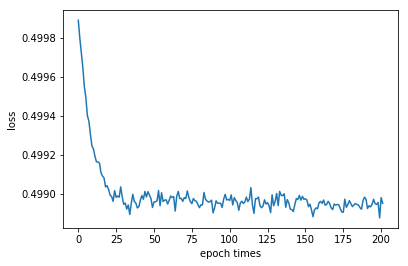

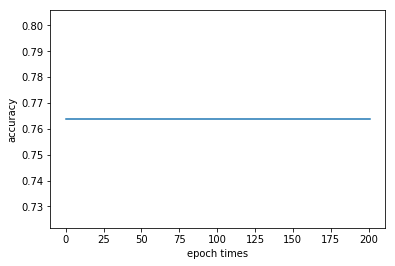

In [29]:
#Adam

G_M = np.zeros(124);
G_M = np.mat(G_M)
G_M = G_M.T

m =  np.zeros(124)
m = np.mat(m)
m = m.T

w_Adam = np.zeros(124);
w_Adam = np.mat(w_Adam)
w_Adam = w_Adam.T

loss = 0
iterator = 0
times3 = []
loss_Adam = []
accuracy_Adam =[]
c = 0.001

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)

    
    #更新w
    w_Adam = gradient_Adam(X_train,y_train,w_Adam,c,G_M,m,iterator+1)
    
    loss = cal_loss(X_train,y_train,w_Adam,0.5)
    
    times3.append(iterator)
    loss_Adam.append(loss[0,0])
    accuracy_Adam.append(cal_right_rate(X_Test,y_Test,w_Adam))
    
    if ( iterator>200):  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times3 , loss_Adam)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times3 , accuracy_Adam)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

In [10]:
def gradient(x,y,w):

    M = x.shape[0]

    N = y.shape[0]
    m = np.zeros((M,1))
    _y = y.T

    for i in range(M):

        if(1 - _y[i,0]*(x[i]*w))<0:
            _y[i] = 0
    g = x.T.dot(_y)
    g = w + 0.0002*g/M
    return g

In [9]:
def gradient_NAG(x,y,w,c,v):

    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T

    phi = 0.9
    _y = np.zeros(124)
    _y = np.mat(_y)
    _y = _y.T
    for i in range(M):

        if(1 - (y[i,0]*(x[i]*w))[0,0])>=0:
            _y = - y[i,0]*(x[i])
        g = _y.T+ g
        
    #print('_y',_y.shape)
    #print('g',g.shape)
    g = w + c*g/M

    v = phi*v + c*g
    w = w - v
    return w

In [35]:
def gradient_RMSProp(x,y,w,c,G):
  
    Gt = G
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T

    phi = 0.95

    _y = np.zeros(124)
    _y = np.mat(_y)
    _y = _y.T
    for i in range(M):

        if(1 - (y[i,0]*(x[i]*w))[0,0])>=0:
            _y = - y[i,0]*(x[i])
        g = _y.T+ g
            

    g = w + c*g/M

    Gt = phi*Gt + (1-phi)* np.multiply(g , g)
    w = w - np.multiply(c/np.sqrt(Gt + 1e-8),g)
    return w
    

In [25]:
def gradient_AdaDelta(x,y,w,Gt,Delt):
    
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T

    phi = 0.95

    _y = np.zeros(124)
    _y = np.mat(_y)
    _y = _y.T
    for i in range(M):

        if(1 - (y[i,0]*(x[i]*w))[0,0])>=0:
            _y = - y[i,0]*(x[i])
        g = _y.T+ g
            
    
    g = w + g/M
    
    Gt = phi*Gt + (1-phi)* np.multiply(g , g)
    DeltaW = - (np.multiply((np.sqrt(Delt + 1e-8)/np.sqrt(Gt + 1e-8)),g))
    w = w + DeltaW

    Delt = phi*Delt + (1-phi)* np.multiply(DeltaW , DeltaW)
    return w

In [6]:
def gradient_Adam(x,y,w,c,Gt,mt,k):
   
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T

    phi = 0.999
    beta = 0.9

    _y = np.zeros(124)
    _y = np.mat(_y)
    _y = _y.T
    for i in range(M):

        if(1 - (y[i,0]*(x[i]*w))[0,0])>=0:
            _y = - y[i,0]*(x[i])
        g = _y.T+ g
            

    g = w + c*g/M
    
    Gt = phi*Gt + (1-phi)* np.multiply(g , g)
    mt = beta*mt + (1-beta)*g
    alpha = c * np.sqrt(1 - phi**k)/np.sqrt(1-beta**k)
    w = w - alpha * mt /np.sqrt(Gt + 1e-8)
    c = c/np.sqrt(k)
    return w

In [5]:
def cal_loss(x,y,w,c):
    
    l = 0
    M = x.shape[0]
    _y = np.zeros((M,1))

    for i in range(M):
        if(1 - (y[i,0]*(x[i]*w))[0,0])<0:
            _y[i]=0

        else :

            _y[i]=1 - (y[i]*(x[i]*w))[0,0]

        l+=_y[i]

    l/=M
    l*=c
    l = (w.T*w)/2 +l

    return l

In [22]:
def cal_right_rate(x,y,w):
  
    m = y.shape[0]
    right_num = 0 

    right = np.sign(x*w )

    for i in range(m):

        if (right[i])[0,0] == (y[i])[0,0]:
            
            right_num+=1

    return right_num/m
    

In [3]:
def cut_data(X,Y,r):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=r)
    return X_test,y_test